# **Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist**
- **Nama:** Rafi Imam Dwiyanto
- **Email:** imamdwiyanto2003@gmail.com
- **ID Dicoding:** rafi_imam_o13V

## **Menentukan Pertanyaan Bisnis**

- Kategori produk apa yang mendapatkan jumlah review sempurnanya (5 dari 5) terbanyak dan jumlah review terburuk (1 dari 5) terbanyak?
- Kategori produk apa yang paling laku dan paling tidak laku dengan status pemesanan yang tidak dicancel?

## **Import Semua Packages/Library yang Digunakan**

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Data Wrangling**

### **Gathering Data**

In [115]:
customers_df = pd.read_csv("olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [116]:
geolocation_df = pd.read_csv("olist_geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [117]:
order_items_df = pd.read_csv("olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [118]:
order_payments_df = pd.read_csv("olist_order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [119]:
order_reviews_df = pd.read_csv("olist_order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [120]:
orders_df = pd.read_csv("olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [121]:
products_df = pd.read_csv("olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [122]:
sellers_df = pd.read_csv("olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [123]:
product_category_name_translation_df = pd.read_csv("product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Tabel `customers_df` menyimpan informasi terkait customer.
- Tabel `geolocation_df` menyimpan informasi detail terkait geolokasi.
- Tabel `order_items_df` menyimpan informasi terkait pemesanan per barang.
- Tabel `order_payments_df` menyimpan informasi terkait pembayaran pesanan.
- Tabel `order_reviews_df` menyimpan informasi terkait penilaian pesanan dari customer.
- Tabel `orders_df` menyimpan informasi terkait detail pemesanan.
- Tabel `products_df` menyimpan informasi terkait detail produk yang dijual.
- Tabel `sellers_df` menyimpan informasi terkait detail penjual.
- Tabel `product_category_name_translation_df` menyimpan informasi terkait hasil terjemahan nama produk dari bahasa Portuguese menjadi bahasa Inggris.

### **Assessing Data**

#### **Menilai Data `cutomers_df`**

In [124]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [125]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### **Menilai Data `geolocation_df`**

In [126]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [127]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### **Menilai Data `order_items_df`**

In [128]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [129]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### **Menilai Data `order_payments_df`**

In [130]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [131]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### **Menilai Data `order_reviews_df`**

In [132]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [133]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [134]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### **Menilai Data `orders_df`**

In [135]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [136]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [137]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### **Menilai Data `products_df`**

In [138]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [139]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [140]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### **Menilai Data `sellers_df`**

In [141]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [142]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### **Menilai Data `product_category_name_translation_df`**

In [143]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [144]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### **Insight Assesing Data**

**Insight:**
- Terdapat duplikasi data pada data `geolocation_df`.
- Terdapat kesalahan tipe data pada kolom `shipping_limit_date` pada data `order_items_df` yang seharusnya bertipe data datetime.
- Terdapat missing value pada kolom `review_comment_title` dan `review_comment_message` pada data `order_reviews_df`.
- Terdapat kesalahan tipe data pada kolom `review_creation_date` dan `review_answer_timestamp` pada data `order_reviews_df` yang seharusnya bertipe data datetime.
- Terdapat missing value pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` pada data `orders_df`.
- Terdapat kesalahan tipe data pada kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` pada data `orders_df` yang seharusnya bertipe data datetime.
- Terdapat missing value di hampir semua kolom kecuali kolom `product_id` pada data `products_df`.

### **Cleaning Data**

#### **Membersihkan Data `geolocation_df`**

##### Menghapus duplikasi data pada kolom `geolocation_df`.

In [145]:
geolocation_df.drop_duplicates(inplace=True)

In [146]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


#### **Membersihkan Data `order_items_df`**

##### Mengganti tipe data pada kolom `shipping_limit_date`.

In [147]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [148]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### **Membersihkan Data `order_reviews_df`**

##### Merubah tipe data beberapa kolom yang menyimpan informasi tanggal/date.

In [149]:
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [150]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


##### Mengisi missing value pada kolom `review_comment_title`.

In [151]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [152]:
# Karena missing value menyimpan informasi penting, maka saya memutuskan untuk mengisi missing value tersebut dengan teks "Prefer not to comment".
order_reviews_df.fillna(value="No Comment.", inplace=True)

In [153]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### **Membersihkan Data `orders_df`**

##### Mengubah tipe data pada kolom yang seharusnya bertipe data datetime

In [154]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", 
                    "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [155]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Mengisi missing value pada kolom `order_approved_at`

In [156]:
# Terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date pada data orders_df.
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [157]:
# Karena data pada kolom order_approved_at merupakan data datetime, maka saya akan mengisi missing value dengan metode interpolate
orders_df.order_approved_at.interpolate(method='linear', limit_direction='forward', inplace=True)

In [158]:
orders_df.order_approved_at.isna().sum()

0

##### Mengisi missing value pada kolom `order_delivered_carrier_date`

In [159]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17.000,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14.000,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09.000,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57.000,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05.000,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2017-07-30 14:56:27.500,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05.000,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2017-10-26 01:46:38.000,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47.000,NaT,NaT,2017-09-15


In [160]:
# Karena data pada kolom order_delivered_carrier_date merupakan data datetime, maka saya akan mengisi missing value dengan metode interpolate
orders_df.order_delivered_carrier_date.interpolate(method='linear', limit_direction='forward', inplace=True)

In [161]:
orders_df.order_delivered_carrier_date.isna().sum()

0

##### Mengisi missing value pada kolom `order_delivered_customer_date`

In [162]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17.000,2017-06-16 12:32:55.000000000,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18.000,2018-06-05 14:32:00.000000000,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14.000,2018-05-19 14:03:45.500000000,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09.000,2017-09-20 04:25:36.000000000,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30.000,2018-01-11 19:39:23.000000000,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2017-07-30 14:56:27.500,2017-07-31 21:12:11.500000000,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05.000,2018-06-16 01:41:00.000000000,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2017-10-26 01:46:38.000,2018-03-07 10:04:22.666666752,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47.000,2018-05-16 22:46:11.333333248,NaT,2017-09-15


In [163]:
orders_df.order_delivered_customer_date.interpolate(method='linear', limit_direction='forward', inplace=True)

In [164]:
orders_df.order_delivered_customer_date.isna().sum()

0

In [165]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### **Membersihkan Data `products_df`**

##### Mengisi missing value pada kolom `product_category_name`

In [166]:
products_df[products_df.product_category_name.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [167]:
# Karena data pada kolom product_category_name bukan data numerik, maka missing value dapat diisi dengan data string "Unknown".
products_df.product_category_name.fillna(value="Unknown", inplace=True)

In [168]:
products_df.product_category_name.isna().sum()

0

##### Mengisi missing value pada kolom `product_name_leght`

In [169]:
products_df[products_df.product_name_lenght.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,Unknown,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,Unknown,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,Unknown,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,Unknown,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,Unknown,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [170]:
# Karena data pada kolom product_name merupakan data numerik kontinu, maka missing value dapat diisi dengan mean.
products_df.product_name_lenght.fillna(value=products_df.product_name_lenght.mean(), inplace=True)

In [171]:
products_df.product_name_lenght.isna().sum()

0

##### Mengisi missing value pada kolom `product_description_lenght`

In [172]:
products_df[products_df.product_description_lenght.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,Unknown,48.476949,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,Unknown,48.476949,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,Unknown,48.476949,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,Unknown,48.476949,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,Unknown,48.476949,NaN,NaN,300.0,35.0,7.0,12.0


In [173]:
# Karena data dari kolom product_description_lenght merupakan data numerik kontinu, maka missing value dapat diisi dengan mean.
products_df.product_description_lenght.fillna(value=products_df.product_description_lenght.mean(), inplace=True)

In [174]:
products_df.product_description_lenght.isna().sum()

0

##### Mengisi missing value pada kolom `product_photos_qty`

In [175]:
products_df[products_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,Unknown,48.476949,771.495285,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,Unknown,48.476949,771.495285,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,Unknown,48.476949,771.495285,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,Unknown,48.476949,771.495285,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,Unknown,48.476949,771.495285,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,Unknown,48.476949,771.495285,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,Unknown,48.476949,771.495285,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,Unknown,48.476949,771.495285,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,Unknown,48.476949,771.495285,NaN,1300.0,45.0,16.0,45.0


In [176]:
# Karena data pada kolom product_photos_qty merupakan data numerik diskrit, maka missing value dapat diiisi dengan angka nilai median.
products_df.product_photos_qty.fillna(value=products_df.product_photos_qty.median(), inplace=True)

In [177]:
products_df.product_photos_qty.isna().sum()

0

##### Mengisi missing value pada kolom `product_weight_g`

In [178]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.000000,865.000000,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,Unknown,48.476949,771.495285,1.0,NaN,NaN,NaN,NaN


In [179]:
# Karena data yang ada pada kolom product_weight_g merupakan data numerik kontinu, maka missing value dapat diisi dengan nilai mean.
products_df.product_weight_g.fillna(value=products_df.product_weight_g.mean(), inplace=True)

In [180]:
products_df.product_weight_g.isna().sum()

0

##### Mengisi missing value pada kolom `product_length_cm`

In [181]:
products_df[products_df.product_length_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.000000,865.000000,3.0,2276.472488,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,Unknown,48.476949,771.495285,1.0,2276.472488,NaN,NaN,NaN


In [182]:
# Karena data pada kolom product_length_cm merupakan data numerik kontinu, maka missing value pada kolom ini dapat diisi dengan nilai mean nya.
products_df.product_length_cm.fillna(value=products_df.product_length_cm.mean(), inplace=True)

In [183]:
products_df.product_length_cm.isna().sum()

0

##### Mengisi missing value pada kolom `product_height_cm`

In [184]:
products_df[products_df.product_height_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.000000,865.000000,3.0,2276.472488,30.815078,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,Unknown,48.476949,771.495285,1.0,2276.472488,30.815078,NaN,NaN


In [185]:
# Karena data pada kolom product_height_cm merupakan data numerik kontinu, maka missing value pada kolom ini dapat diisi dengan nilai mean nya.
products_df.product_height_cm.fillna(value=products_df.product_height_cm.mean(), inplace=True)

In [186]:
products_df.product_height_cm.isna().sum()

0

##### Mengisi missing value pada kolom `product_width_cm`

In [187]:
products_df[products_df.product_width_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.000000,865.000000,3.0,2276.472488,30.815078,16.937661,NaN
18851,5eb564652db742ff8f28759cd8d2652a,Unknown,48.476949,771.495285,1.0,2276.472488,30.815078,16.937661,NaN


In [188]:
# Karena data pada kolom product_width_cm merupakan data numerik kontinu, maka missing value dapat diisi dengan nilai mean.
products_df.product_width_cm.fillna(value=products_df.product_width_cm.mean(), inplace=True)

In [189]:
products_df.product_width_cm.isna().sum()

0

In [190]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### **Insight Cleaning Data**

**Insight:**
- Tidak semua data dibersihkan karena beberapa data telah bersih.
- Pada data products_df terdapat missing value pada kolom product_category_name. Missing values tersebut saya isi dengan teks "Unknown", karena saya rasa pengisian nilai ini cukup relevan dengan kolom product_category_name.

## **Exploratory Data Analysis (EDA)**

#### Menggabungkan data order_reviews_df dengan order_items_df

**Penggabungan kedua data ini bertujuan untuk menjawab pertanyaan pertama terkait nilai review tertinggi pada kategori produk. Akan tetapi, data yang didapatkan dari penggabungan kedua data ini masih belum lengkap, sehingga penggabungan ini merupakan langkah pengantar ke penggabungan data lainnya.**

In [191]:
order_reviews_items_df = pd.merge(
    left=order_reviews_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_reviews_items_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Comment.,No Comment.,2018-01-18,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Comment.,No Comment.,2018-01-18,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Comment.,No Comment.,2018-03-10,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Comment.,No Comment.,2018-02-17,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Comment.,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85


#### Menggabungkan data order_reviews_items_df dengan products_df

**Setelah menggabungkan data order_reviews_df dengan order_items_df, langkah selanjutnya saya akan menggabungkan data tersebut dengan products_df. Penggabungan ini bertujuan untuk mengambil informasi detail terkait produk, seperti product_cateogry_name.**

In [192]:
order_reviews_items_products_df = pd.merge(
    left=order_reviews_items_df,
    right=products_df,
    how="right",
    left_on="product_id",
    right_on="product_id"
)
order_reviews_items_products_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

#### Menggabungkan data order_reviews_items_products_df dan product_category_name_translation_df

**Setelah memperoleh detail informasi produk, langkah akhir pada penggabungan data ini ialah menggabungkan data sebelumnya dengan data product_category_name_translation_df. Karena pada product_category_df sebelumnya, nama kategori yang kita peroleh masih dalam bahasa Portuguese, di mana akan lebih sulit untuk dimengerti dan akan lebih mudah jika kita menggunakan nama kategori dalam bahasa Inggris yang ada pada data product_category_name_translation_df.**

In [193]:
order_reviews_items_products_translation_df = pd.merge(
    left=order_reviews_items_products_df,
    right=product_category_name_translation_df,
    how="right",
    left_on="product_category_name",
    right_on="product_category_name"
)
order_reviews_items_products_translation_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

#### Menggabungkan data order_reviews_items_products_translation_df dan orders_df

**Setelah pertanyaan pertama terjawab, selanjutnya kita akan menjawab pertanyaa kedua,"Kategori produk apa yang paling banyak dipesan dengan status pemesanan tidak dicancel?". Untuk menjawab pertanyaan kedua, kita perlu untuk melakukan beberapa penggabungan data. Penggabungan data pertama adalah kita akan menggabungkan data dari data yang dihasilkan pada saat mengeksplorasi data pada pertanyaan pertama (order_reviews_items_products_translation_df) dengan dara orders_df. Penggabungan ini dilakukan untuk memperoleh informasi order_status yang terdapat pada data orders_df.**

In [194]:
product_category_and_orders_df = pd.merge(
    left=order_reviews_items_products_translation_df,
    right=orders_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
product_category_and_orders_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

#### Menggabungkan data yang diperlukan dan menyimpannya ke dalam file csv

In [195]:
lengkap_df = pd.merge(
    left=product_category_and_orders_df,
    right=order_payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [196]:
lengkap_df.to_csv("lengkap_df.csv", index=False)

#### Kategori produk dengan rating tertinggi

**Setelah melakukan penggabungan data, langkah selanjutnya adalah mengelompokkan data berdasarkan review_score dan product_cateogory_name_english. Setelah dikelompokkan, kita dapat menghitung kateogori apa yang memperoleh rating tertinggi dan berapa jumlah customer yang memberikan rating tertinggi.**

In [197]:
product_category_review_tertinggi = lengkap_df[lengkap_df['review_score'] == 5]

In [198]:
category_rating_5 = product_category_review_tertinggi.groupby('product_category_name_english').size().reset_index(name='Jumlah Rating 5')

In [199]:
category_rating_5 = category_rating_5.sort_values(by='Jumlah Rating 5', ascending=False).reset_index(drop=True)

In [200]:
category_rating_5_topTen = category_rating_5[1:11]
category_rating_5_topTen

,product_category_name_english,Jumlah Rating 5
1,health_beauty,6024
2,sports_leisure,5284
3,furniture_decor,4698
4,computers_accessories,4347
5,housewares,4203
6,watches_gifts,3450
7,toys,2622
8,garden_tools,2567
9,auto,2454
10,telephony,2408


**Berdasarkan hasil di atas, dapat diketahui bahwa produk dengan kategori health_beatufy menjadi produk yang mendapatkan penilaian terbaik dari customer, disusul dengan kategori bed_bath_table pada posisi kedua, dan sports_leisure pada posisi ketiga. Dan terjawablah pertanyaan pertama.**

#### Kategori produk dengan rating terendah

In [201]:
product_category_review_terendah = lengkap_df[lengkap_df['review_score'] == 1]

In [202]:
category_rating_1 = product_category_review_terendah.groupby('product_category_name_english').size().reset_index(name='Jumlah Rating 1')

In [203]:
category_rating_1 = category_rating_1.sort_values(by='Jumlah Rating 1', ascending=False).reset_index(drop=True)

In [204]:
category_rating_1_topTen = category_rating_1[1:11]
category_rating_1_topTen

,product_category_name_english,Jumlah Rating 1
1,furniture_decor,1303
2,computers_accessories,1199
3,health_beauty,1131
4,sports_leisure,1061
5,housewares,869
6,watches_gifts,780
7,garden_tools,602
8,telephony,600
9,auto,512
10,toys,463


**Berdasarkan hasil di atas, dapat diketahui bahwa produk dengan kategori furniture_decor menjadi produk yang mendapatkan penilaian terbaik dari customer.**

#### Kategori produk yang paling banyak dipesan

**Setelah menggabungkan data-data yang diperlukan, selanjutnya kita dapat mengelompokkan kategori produk dengan order status. Di mana fokus kita adalah untuk menjawab pertanyaan kedua terkait dengan kategori produk dengan pemesanan terbanyak yang status pemesanan (order status) nya tidak dicancel (canceled). Dengan kode di bawah ini, kita dapat menggali informasi tersebut.**

In [205]:
product_and_order_status = lengkap_df[['product_category_name_english', 'order_status']]

In [206]:
product_and_order_status = product_and_order_status[product_and_order_status['order_status'] != 'canceled']
product_and_order_status.head()

,product_category_name_english,order_status
0,health_beauty,delivered
1,health_beauty,delivered
2,health_beauty,delivered
3,health_beauty,delivered
4,health_beauty,delivered


**Kategori produk yang paling banyak dipesan adalah bed_beth_table tanpa ada pembatalan pemesanan adalah bed_bath_table, disusul dengan health_beauty, dan sports_leisure.**

#### Kategori produk yang paling sedikit dipesan

In [207]:
lengkap_df['order_status'] = 1

In [208]:
lengkap_df.rename(columns={'order_status': 'total_order'}, inplace=True)

In [209]:
product_and_order_status_tidak_laku = lengkap_df.groupby('product_category_name_english')['total_order'].sum().sort_values(ascending=True).reset_index()

In [210]:
product_and_order_status_tidak_laku

,product_category_name_english,total_order
0,security_and_services,2
1,fashion_childrens_clothes,8
2,cds_dvds_musicals,14
3,la_cuisine,15
4,arts_and_craftmanship,24
...,...,...
66,computers_accessories,8107
67,furniture_decor,8762
68,sports_leisure,8954
69,health_beauty,9956


#### **Insight**

**Insight:**
- Pada produk dengan review terbaik didapatkan bahwa kategori barang healt_beauty menjadi kategori peringkat pertama yang mempunyai penilaian terbaik.
- Kategori produk bed_bath_table merupakan produk yang paling banyak dipesan dengan status pemesanan tidak dicancel, disusul dengan health_beauty pada posisi kedua.

## **Visualisasi Data**

### Pertanyaan 1: Kategori produk apa yang memiliki nilai review tinggi terbanyak dan review rendah terbanyak?

#### Kategori produk dengan review tinggi terbanyak

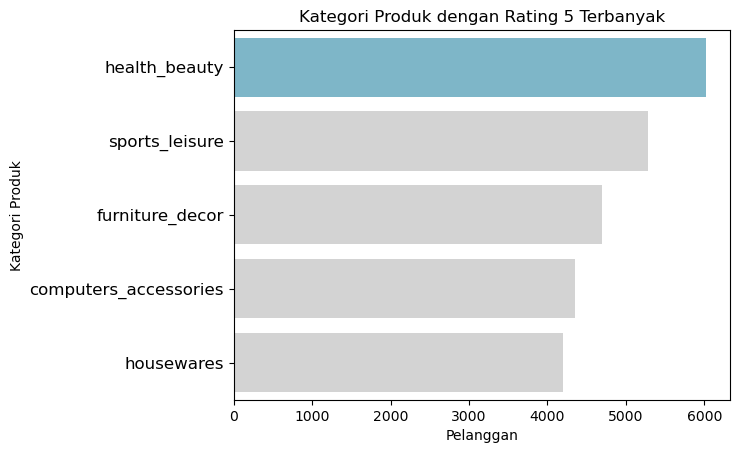

In [211]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y='product_category_name_english', x='Jumlah Rating 5', data=category_rating_5_topTen.head(), orient='h', palette=colors)
plt.xlabel("Pelanggan")
plt.ylabel("Kategori Produk")
plt.title("Kategori Produk dengan Rating 5 Terbanyak")
plt.tick_params(axis ='y', labelsize=12)
plt.show()

#### Kategori produk apa yang memiliki nilai review rendah terbanyak?

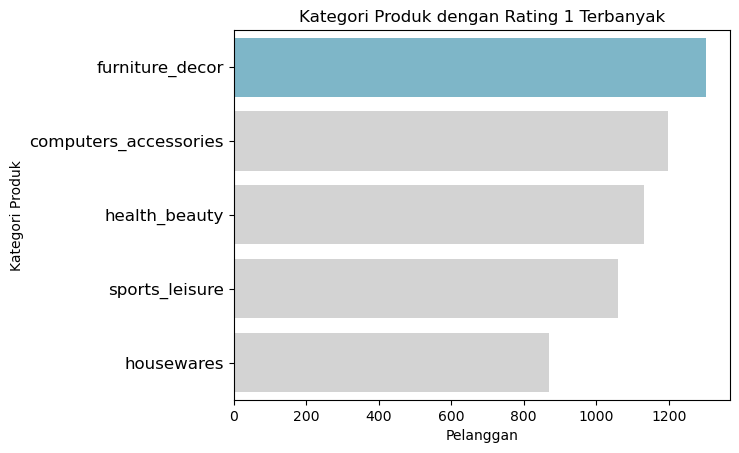

In [212]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y='product_category_name_english', x='Jumlah Rating 1', data=category_rating_1_topTen.head(), orient='h', palette=colors)
plt.xlabel("Pelanggan")
plt.ylabel("Kategori Produk")
plt.title("Kategori Produk dengan Rating 1 Terbanyak")
plt.tick_params(axis ='y', labelsize=12)
plt.show()

### Pertanyaan 2: Kategori produk apa yang paling Laku dan yang paling Tidak Laku dengan status pemesanan tidak dicancel?

#### Kategori produk yang paling Laku dengan status pemesanan tidak dicancel

In [213]:
product_and_order_status = lengkap_df.groupby('product_category_name_english')['total_order'].sum().sort_values(ascending=False).reset_index()

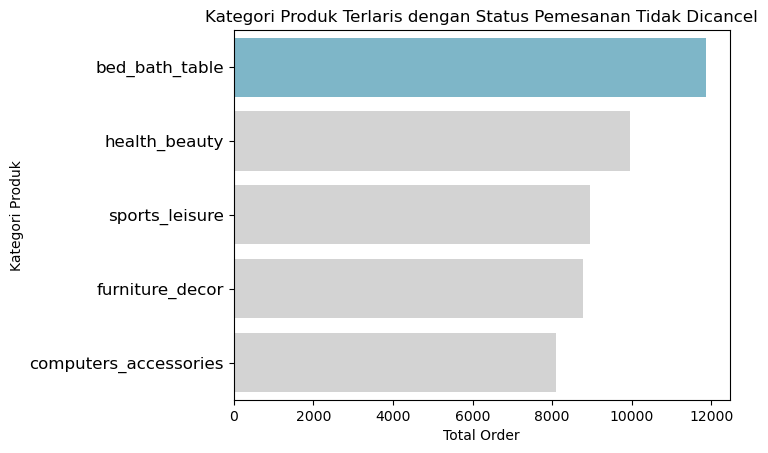

In [214]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y='product_category_name_english', x='total_order', data=product_and_order_status.head(), orient='h', palette=colors)
plt.xlabel("Total Order")
plt.ylabel("Kategori Produk")
plt.title("Kategori Produk Terlaris dengan Status Pemesanan Tidak Dicancel")
plt.tick_params(axis ='y', labelsize=12)
plt.show()

#### Kategori produk yang paling Tidak Laku dengan Status Pemesanan Tidak Dicancel

In [215]:
product_and_order_status_tidak_laku = lengkap_df.groupby(
    'product_category_name_english')['total_order'].sum().sort_values(ascending=True).reset_index()

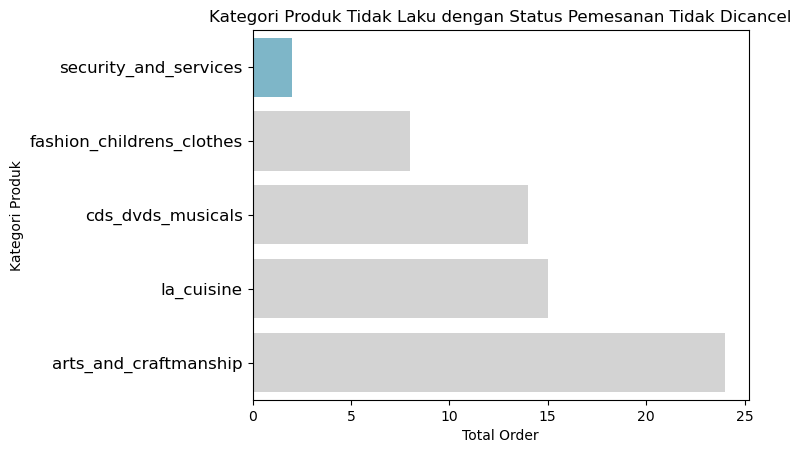

In [216]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y='product_category_name_english', x='total_order', data=product_and_order_status_tidak_laku.head(), orient='h', palette=colors)
plt.xlabel("Total Order")
plt.ylabel("Kategori Produk")
plt.title("Kategori Produk Tidak Laku dengan Status Pemesanan Tidak Dicancel")
plt.tick_params(axis ='y', labelsize=12)
plt.show()

### Insight Visualisasi Data

**Insight:**
- Dari visualisasi data kita dapat mengetahui mana kategori produk yang paling laku dan yang paling tidak laku dengan status pemesanan tidak dicancel.
- Dari visualisasi data kita dapat mengetahui kategori produk yang dinilai paling baik dan paling buruk.

## **Conclusion:**

- Berdasarkan hasil analisa data ditambah dengan visualisasinya, kita dapat melihat bahwa pada produk terlaku tidak selalu mempunyai review yang baik, akan tetapi akan merata karena semakin banyak customer yang membeli produk itu maka kemungkinan apapun dapat terjadi terkait dengan kualitas produk. Solusinya adalah dengan mengevaluasi kembali review buruk yang diberikan oleh customer sebagai bahan peningkatan kualitas produk tersebut.
- Berdasarkan hasil analisa data kita menemukan kategori produk apa saja yang paling sering dicari oleh customer, dengan data ini kita dapat memanfaatkan peluang bisnis dengan beradaptasi terhadap kebutuhan dan keinginan konsumen.